In [1]:
# Imports
from fake_useragent import UserAgent

## Testing "link_extractor"

In [2]:
import pandas as pd
from etl_pipeline.link_extractor import Google, Bing, Yahoo

### Testing Google class

In [3]:
google = Google(company="UBS")
google_links = google.get_links(20)

In [4]:
df = pd.DataFrame(google_links)

In [5]:
df.shape

(300, 4)

In [6]:
df.head(1)

,engine,se_link,se_title,se_source
0,Google,https://www.barrons.com/articles/top-100-priva...,Top 100 Private Wealth Management Teams: How T...,Barron's


In [7]:
df.tail(1)

,engine,se_link,se_title,se_source
299,Google,https://www.reuters.com/business/finance/silic...,UBS mulls Credit Suisse takeover amid U.S. ban...,Reuters


### Testing Bing class

In [8]:
bing = Bing(company="UBS")
bing_links = bing.get_links(20)

In [9]:
df = pd.concat([df, pd.DataFrame(bing_links)], ignore_index=True)

In [10]:
df.head(1)

,engine,se_link,se_title,se_source
0,Google,https://www.barrons.com/articles/top-100-priva...,Top 100 Private Wealth Management Teams: How T...,Barron's


In [11]:
df.tail(1)

,engine,se_link,se_title,se_source
467,Bing,https://www.ubs.com/global/en.html,UBS Global,UBS


### Testing Yahoo class

In [12]:
yahoo = Yahoo(company="UBS")
yahoo_links = yahoo.get_links(20)

In [13]:
df = pd.concat([df, pd.DataFrame(yahoo_links)], ignore_index=True)

In [14]:
df.head(1)

,engine,se_link,se_title,se_source
0,Google,https://www.barrons.com/articles/top-100-priva...,Top 100 Private Wealth Management Teams: How T...,Barron's


In [15]:
df.tail(1)

,engine,se_link,se_title,se_source
657,Yahoo,https://www.kolotv.com/prnewswire/2023/04/17/m...,"Melius Research Welcomes Technology Expert, Be...",KOLO 8 Reno


### Analyze Dataframe

In [16]:
df.shape

(658, 4)

In [17]:
df["engine"].value_counts()

Google    300
Yahoo     190
Bing      168
Name: engine, dtype: int64

In [18]:
df["se_link"].duplicated().sum()

83

In [19]:
df = df.drop_duplicates(subset='se_link')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 657
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   engine     575 non-null    object
 1   se_link    575 non-null    object
 2   se_title   575 non-null    object
 3   se_source  575 non-null    object
dtypes: object(4)
memory usage: 22.5+ KB


## Testing "html_content_extractor2"

### Extract Content

In [21]:
from etl_pipeline.content_extractor import get_content

In [22]:
df = df[~df['se_link'].isna()]
urls = df['se_link'].to_list()

In [23]:
len([u for u in urls if u == None])

0

In [24]:
contents = get_content(urls)

Getting news article info: 100%|██████████| 575/575 [06:01<00:00,  1.59it/s]


In [25]:
df = pd.merge(df, pd.DataFrame(contents), left_on='se_link', right_on='bs_link')

In [26]:
df.head()

,engine,se_link,se_title,se_source,n3k_link,n3k_title,n3k_body,n3k_author,n3k_published,bs_link,bs_title,bs_body
0,Google,https://www.barrons.com/articles/top-100-priva...,Top 100 Private Wealth Management Teams: How T...,Barron's,https://www.barrons.com/articles/top-100-priva...,How This UBS Megateam Is Building Portfolios Now,Few clients in the past 15 years have asked UB...,[Andrew Welsch],None,https://www.barrons.com/articles/top-100-priva...,How This UBS Megateam Is Building Portfolios Now,Few clients in the past 15 years have asked UB...
1,Google,https://www.livemint.com/companies/news/us-fed...,US Fed approves UBS-Credit Suisse merger. Deta...,Mint,https://www.livemint.com/companies/news/us-fed...,US Fed approves UBS-Credit Suisse merger. Deta...,UBS-Credit Suisse merger: The Board of Governo...,[],2023-04-15 06:02:44+05:30,https://www.livemint.com/companies/news/us-fed...,US Fed approves UBS-Credit Suisse merger. Deta...,"In this Swiss-brokered rescue deal, the US ..."
2,Google,https://www.cnbc.com/2023/04/17/ubs-says-buy-t...,UBS says buy this 'underappreciated' software ...,CNBC,https://www.cnbc.com/2023/04/17/ubs-says-buy-t...,UBS says buy this 'underappreciated' software ...,"UBS says Okta 's ""compelling mix of growth and...","[Hakyung Kim, Https, Www.Linkedin.Com In Hakyu...",2023-04-17 00:00:00,https://www.cnbc.com/2023/04/17/ubs-says-buy-t...,UBS says buy this 'underappreciated' software ...,Credit Cards\nLoans\nBanking\nMortgages\nInsur...
3,Google,https://finance.yahoo.com/news/swiss-governmen...,Swiss government awards $9.7 million contract ...,Yahoo Finance,https://finance.yahoo.com/news/swiss-governmen...,Swiss government awards $9.7 million contract ...,By Oliver Hirt\n\nZURICH (Reuters) - The Swiss...,[Oliver Hirt],None,https://finance.yahoo.com/news/swiss-governmen...,Yahoo Finance,By Oliver Hirt\nZURICH (Reuters) - The Swiss g...
4,Google,https://www.marketwatch.com/story/credit-suiss...,Credit Suisse fund outflows widen to $5.6 bill...,MarketWatch,https://www.marketwatch.com/story/credit-suiss...,Credit Suisse fund outflows widen to $5.6 bill...,Outflows from Credit Suisse branded investment...,[David Ricketts],None,https://www.marketwatch.com/story/credit-suiss...,\n Credit Suisse fund outflows widen to $5.6 ...,The latest outflows will pile pressure on the ...


In [27]:
df.tail()

,engine,se_link,se_title,se_source,n3k_link,n3k_title,n3k_body,n3k_author,n3k_published,bs_link,bs_title,bs_body
486,Yahoo,https://www.etfdailynews.com/2023/04/17/eudaim...,Eudaimonia Partners LLC Cuts Stock Holdings in...,ETF DAILY NEWS,https://www.etfdailynews.com/2023/04/17/eudaim...,Eudaimonia Partners LLC Cuts Stock Holdings in...,Eudaimonia Partners LLC trimmed its holdings i...,[Marketbeat News],2023-04-17 00:00:00,https://www.etfdailynews.com/2023/04/17/eudaim...,Eudaimonia Partners LLC Cuts Stock Holdings in...,Eudaimonia Partners LLC trimmed its holdings i...
487,Yahoo,https://www.kktv.com/prnewswire/2023/04/17/mel...,"Melius Research Welcomes Technology Expert, Be...",KKTV 11 Colorado Springs,https://www.kktv.com/prnewswire/2023/04/17/mel...,"Melius Research Welcomes Technology Expert, Be...","NEW YORK , April 17, 2023 /PRNewswire/ -- Meli...",[],2023-04-17 00:00:00,https://www.kktv.com/prnewswire/2023/04/17/mel...,"Melius Research Welcomes Technology Expert, Be...","NEW YORK , April 17, 2023 /PRNewswire/ -- Meli..."
488,Yahoo,http://www.cleveland19.com/prnewswire/2023/04/...,"Melius Research Welcomes Technology Expert, Be...",19 Action News Cleveland,http://www.cleveland19.com/prnewswire/2023/04/...,"Melius Research Welcomes Technology Expert, Be...","NEW YORK , April 17, 2023 /PRNewswire/ -- Meli...",[],2023-04-17 00:00:00,http://www.cleveland19.com/prnewswire/2023/04/...,"Melius Research Welcomes Technology Expert, Be...","NEW YORK , April 17, 2023 /PRNewswire/ -- Meli..."
489,Yahoo,https://www.wbay.com/prnewswire/2023/04/17/mel...,"Melius Research Welcomes Technology Expert, Be...",WBAY Green Bay,https://www.wbay.com/prnewswire/2023/04/17/mel...,"Melius Research Welcomes Technology Expert, Be...","NEW YORK , April 17, 2023 /PRNewswire/ -- Meli...",[],2023-04-17 00:00:00,https://www.wbay.com/prnewswire/2023/04/17/mel...,"Melius Research Welcomes Technology Expert, Be...","NEW YORK , April 17, 2023 /PRNewswire/ -- Meli..."
490,Yahoo,https://www.kolotv.com/prnewswire/2023/04/17/m...,"Melius Research Welcomes Technology Expert, Be...",KOLO 8 Reno,https://www.kolotv.com/prnewswire/2023/04/17/m...,"Melius Research Welcomes Technology Expert, Be...","NEW YORK , April 17, 2023 /PRNewswire/ -- Meli...",[],2023-04-17 00:00:00,https://www.kolotv.com/prnewswire/2023/04/17/m...,"Melius Research Welcomes Technology Expert, Be...","NEW YORK , April 17, 2023 /PRNewswire/ -- Meli..."


In [36]:
len(df[df['n3k_body'] == ''])

8

In [37]:
len(df[df['bs_body'] == ''])

0

## Some NLP Preprocessing

In [ ]:
len(results)

In [ ]:
data = results.loc[results["Body"].str.strip().astype(bool)].reset_index(drop=True)

In [ ]:
# Why would you ever make a string column boolean?
x = ""
bool(x)

In [ ]:
len(data)

In [ ]:
data.head()

In [9]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

import string
import nltk
# Import the stop word list
from nltk.corpus import stopwords
nltk.download("stopwords")
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#Import Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Import stemmer.
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Average Wordcount before pre-processing
data["Body"].apply(lambda x: len(x.split())).mean()

In [ ]:
# Total Wordcount before pre-processing
data["Body"].apply(lambda x: len(x.split())).sum()

### Remove Numbers (We are doing reputational NLP so doesnt seem relevant)

In [10]:
def remove_numbers(text):
    no_nums = "".join([i for i in text if not i.isdigit()])
    return no_nums

In [ ]:
data["Body"] = data["Body"].apply(lambda x: remove_numbers(x))
data["Body"].head(10)

### Removing extra whitespaces / new lines

In [ ]:
data["Body"] = data["Body"].replace(r'\n'," ", regex=True)

### Removing Punctuation

In [11]:
def remove_punctuation(text):
    no_punct = "".join ([c for c in text if c not in string.punctuation])
    return no_punct

In [ ]:
data["Body"] = data["Body"].apply(lambda x: remove_punctuation(x))
data["Body"].head(10)

### Tokenization

In [12]:
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
data["Body"] = data["Body"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Body"].head(10)

### Removing Stopwords

In [13]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words("english")]
    return words

In [ ]:
data["Body"] = data["Body"].apply(lambda x: remove_stopwords(x))
data["Body"].head(10)

### Lemmatization

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize (i) for i in text]
    return lem_text

In [ ]:
data["Body"] = data["Body"].apply(lambda x: word_lemmatizer(x))
data["Body"].head(10)

In [ ]:
# Average Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).mean()

In [ ]:
# Total Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).sum()

### Encoding

In [ ]:
text = data["Body"].apply(lambda x: " ".join(x)).str.cat()

In [ ]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

In [ ]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate (chars) }
itos = { i:ch for i,ch in enumerate (chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''. join ( [itos [i] for i in l]) # decoder: take a list of integers, output a string
print (encode("hii there"))
print (decode(encode("hii there")))

### Wordcloud - Test

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud on Titles only

In [ ]:
data["Title"] = data["Title"].apply(lambda x: remove_numbers(x))
data["Title"] = data["Title"].replace(r'\n'," ", regex=True)
data["Title"] = data["Title"].apply(lambda x: remove_punctuation(x))
data["Title"] = data["Title"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Title"] = data["Title"].apply(lambda x: remove_stopwords(x))
data["Title"] = data["Title"].apply(lambda x: word_lemmatizer(x))

In [ ]:
title_text = data["Title"].apply(lambda x: " ".join(x)).str.cat()

In [ ]:
# Create and generate a word cloud image:
title_wordcloud = WordCloud().generate(title_text)

# Display the generated image:
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Multithreading Implementation Test

In [ ]:
from etl_pipeline.link_extractor import get_all_links # Might make sense to make Search Engines seperate file for clarity
from etl_pipeline.content_extractor import get_content

In [62]:
# max_articles is for each search engine
all_links = get_all_links(company="Donald Trump", max_articles=None)

In [63]:
df = pd.DataFrame(all_links)

In [64]:
df.head()

,engine,se_link,se_title,se_source
0,Yahoo,https://okmagazine.com/p/donald-trump-claims-s...,Donald Trump Claims 'There Is So Much Proof' T...,OK! Magazine
1,Yahoo,https://www.msn.com/en-us/news/politics/donald...,Donald Trump ally fights horrible Ohio State s...,MSN News
2,Yahoo,https://news.yahoo.com/judge-blamed-trump-medi...,A judge blamed Trump for the 'media frenzy' he...,INSIDER via Yahoo News
3,Yahoo,https://www.newsweek.com/trump-poll-arizona-pe...,Donald Trump's team rages over poll showing hi...,Newsweek
4,Yahoo,https://www.stamfordadvocate.com/news/article/...,"Judge: If news taints rape-trial jurors, Trump...",Stamford Advocate


In [65]:
df = df.drop_duplicates(subset='se_link')
urls = df["se_link"].to_list()

In [66]:
contents = get_content(urls)

Getting news article info: 100%|██████████| 454/454 [03:53<00:00,  1.94it/s]


In [67]:
len(contents)

391

In [68]:
df = pd.merge(df, pd.DataFrame(contents), left_on='se_link', right_on='bs_link')

In [69]:
df.head()

,engine,se_link,se_title,se_source,n3k_link,n3k_title,n3k_body,n3k_author,n3k_published,bs_link,bs_title,bs_body
0,Yahoo,https://okmagazine.com/p/donald-trump-claims-s...,Donald Trump Claims 'There Is So Much Proof' T...,OK! Magazine,https://okmagazine.com/p/donald-trump-claims-s...,Donald Trump Claims 'There Is So Much Proof' T...,Here he goes again! In the early morning on Mo...,[Jaclyn Roth],2023-04-17 15:00:00+00:00,https://okmagazine.com/p/donald-trump-claims-s...,Donald Trump Claims 'There Is So Much Proof' T...,Here he goes again! In the early morning on Mo...
1,Yahoo,https://news.yahoo.com/judge-blamed-trump-medi...,A judge blamed Trump for the 'media frenzy' he...,INSIDER via Yahoo News,https://news.yahoo.com/judge-blamed-trump-medi...,A judge blamed Trump for the 'media frenzy' he...,E. Jean Carroll (left) and former President Do...,[Ashley Collman],None,https://news.yahoo.com/judge-blamed-trump-medi...,Yahoo News,A judge has turned down former President Donal...
2,Yahoo,https://www.stamfordadvocate.com/news/article/...,"Judge: If news taints rape-trial jurors, Trump...",Stamford Advocate,https://www.stamfordadvocate.com/news/article/...,"Judge: If news taints rape-trial jurors, Trump...",NEW YORK (AP) — Donald Trump’s rape trial will...,"[Larry Neumeister, Associated Press, John Breu...",2023-04-17 18:04:37,https://www.stamfordadvocate.com/news/article/...,"Judge: If news taints rape-trial jurors, Trump...",Kaplan rejected arguments by Trump attorney Jo...
3,Yahoo,https://www.newsweek.com/donald-trump-e-jean-c...,Donald Trump must face the music,Newsweek,https://www.newsweek.com/donald-trump-e-jean-c...,Donald Trump Must Face the Music,A federal judge denied Donald Trump's request ...,"[Anna Skinner, Cj Pearson, Katherine Mangu-Ward]",2023-04-17 11:42:01-04:00,https://www.newsweek.com/donald-trump-e-jean-c...,Donald Trump Must Face the Music,A federal judge has denied former president Do...
4,Yahoo,https://www.nbcnews.com/politics/congress/trum...,Trump allies take fight to Bragg's backyard wi...,NBC NEWS,https://www.nbcnews.com/politics/congress/trum...,Trump allies take fight to Bragg's backyard wi...,Donald Trump's congressional allies took the f...,"[Https, Media-Cldnry.S-Nbcnews.Com Image Uploa...",None,https://www.nbcnews.com/politics/congress/trum...,Trump allies take fight to Bragg's backyard wi...,Donald Trump's congressional allies took the f...


In [17]:
data["Body"] = data["Body"].apply(lambda x: remove_numbers(x))
data["Body"] = data["Body"].replace(r'\n'," ", regex=True)
data["Body"] = data["Body"].apply(lambda x: remove_punctuation(x))
data["Body"] = data["Body"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Body"] = data["Body"].apply(lambda x: remove_stopwords(x))
data["Body"] = data["Body"].apply(lambda x: word_lemmatizer(x))

In [18]:
body_text = data["Body"].apply(lambda x: " ".join(x)).str.cat()

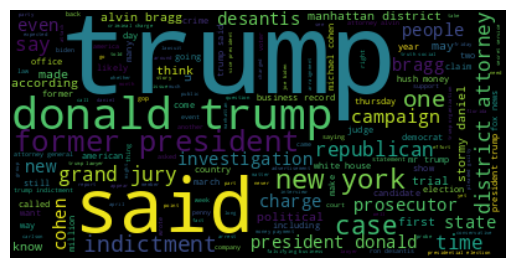

In [19]:
# Create and generate a word cloud image:
title_wordcloud = WordCloud().generate(body_text)

# Display the generated image:
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
len(body_text)

1110282